In [725]:
import nltk
import urllib2
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

We will analyze the text of fairy tales by the Brothers Grimm. To get our word list, we will filter out all tokens that do not start with three letters. This will eliminate punctuation and all common words that will not shed that much light on the content of the text: definite and indefinite articles, conjunctions, prepositions.

In [686]:
url = "http://www.gutenberg.org/cache/epub/2591/pg2591.txt"
raw = urllib2.urlopen(url).read().decode('utf8')
tokens = word_tokenize(raw)
tokens = tokens[400:]
text = nltk.Text(tokens)
words = [w.lower() for w in text]
words = [w for w in words if re.search('^[a-z]{4,}$', w)]

Now we will use $\textit{nltk}$ to get a frequency distribution of the words in the text and return the top 200. 

In [687]:
frequency = nltk.FreqDist(words)
frequencyDist = frequency # save nltk.probability.FreqDist object for graph below
frequency = frequency.most_common()
top200 = frequency[:200]
top200

[(u'said', 1162),
 (u'that', 1094),
 (u'they', 837),
 (u'with', 734),
 (u'then', 653),
 (u'when', 636),
 (u'will', 574),
 (u'have', 499),
 (u'into', 480),
 (u'came', 461),
 (u'went', 442),
 (u'little', 391),
 (u'them', 377),
 (u'there', 375),
 (u'king', 355),
 (u'this', 353),
 (u'were', 344),
 (u'down', 324),
 (u'what', 293),
 (u'away', 292),
 (u'again', 282),
 (u'would', 261),
 (u'could', 260),
 (u'took', 244),
 (u'their', 241),
 (u'your', 238),
 (u'very', 223),
 (u'from', 212),
 (u'time', 200),
 (u'upon', 198),
 (u'which', 196),
 (u'about', 179),
 (u'home', 179),
 (u'must', 175),
 (u'come', 175),
 (u'before', 174),
 (u'father', 174),
 (u'should', 174),
 (u'himself', 171),
 (u'shall', 170),
 (u'thought', 166),
 (u'good', 164),
 (u'soon', 158),
 (u'cried', 153),
 (u'take', 152),
 (u'great', 152),
 (u'back', 150),
 (u'over', 147),
 (u'last', 147),
 (u'long', 147),
 (u'mother', 146),
 (u'give', 145),
 (u'been', 145),
 (u'where', 145),
 (u'once', 145),
 (u'other', 144),
 (u'after', 142),


Taking the most common words, how many unique words represent half of the total words in the corpus?

First, we need to find the total number of words in the corpus. If we take the length of $\textit{words}$, we will get the number of words in the text.

In [688]:
len(words)

51537

In [689]:
half = len(words)/2
half

25768

Likewise, the length of frequency will give us the total number of unique words in the text.

In [690]:
len(frequency)

4742

In [691]:
sum = 0
n = 0 
for word in frequency:
    while sum < half:
        sum += frequency[n][1]
        n += 1
n

146

It appears that the 146 most common words make up half the text in the corpus.

In [692]:
len(words)

51537

In [693]:
sum = 0
n = 0
num = 0
for word in frequency:
    n += 1
    while sum < half:
        sum += frequency[n][1]
        num = n
sum

26256

The Graph below shows the frequency distribution of the top 200 words. The shape of the distribution demonstrates an exponential decline. We move from most common to least common as we move from left to right on the x-acis. The drop-off in word usage is very sharp for the first 30 or so words and then the decline slows dramatically and stabilizes for the rest of the most common words in the corpus. 

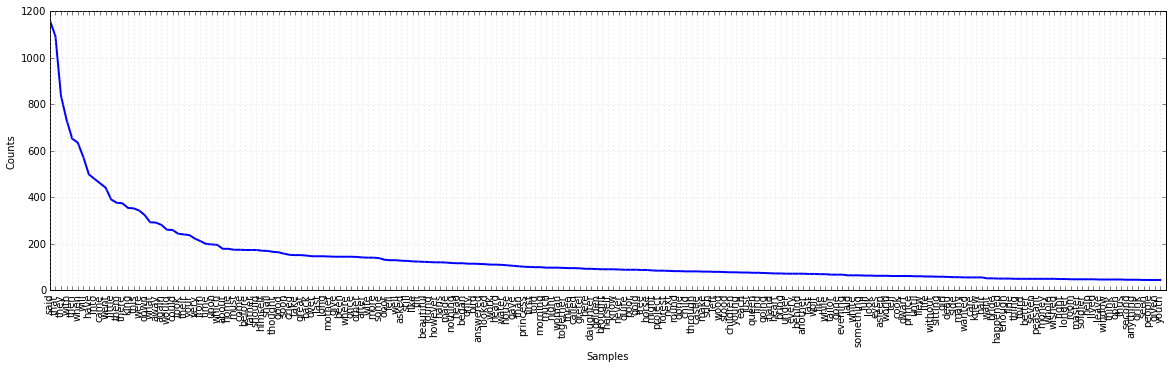

In [698]:
plt.figure(figsize=(20,5))
frequencyDist.plot(200)

Now we must derive the relative frequencies of the top 200 words and dividing them by the total number of words in the corpus.

In [741]:
rf = []
for each in top200:
    rf.append(each[1]/len(words))

In the next plot, we compare the relative frequency of the top 200 words in this corpus with the rank of the word. Zipf's law states the the frequency of a word is inversely proportional to its rank. Here is looks like there is a similar downward trend, but our top 200 words do not demonstrate a perfect inverse proportion. I think that if we compare the frequency distribution of words in this text with others, we would find a wide variety of distributions. The frequency distribution of a text will depends on its length, subject matter, language, and vocabulary of the author (and everything that may influence that). The text we are analyzing here was at one point translated from the original German, which could have increased or decreased the frequency of particular words. 

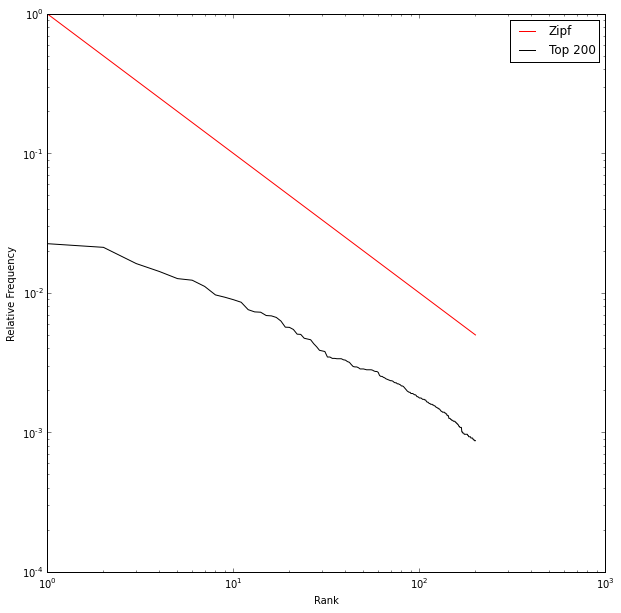

In [755]:
x = [i + 1 for i in range(200)] # create x-axis
y = [1/i for i in x] # create y-axis
fig,ax = plt.subplots(figsize=[10, 10])
ax.plot(x, y, color='red')
ax.plot(x, rf, color = 'black')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Rank")
ax.set_ylabel("Relative Frequency")
ax.legend(['Zipf', 'Top 200'])